<a href="https://colab.research.google.com/github/Abdourahim445/FDSFE_Asylla/blob/main/HW8/asylla_homework8_instructions_nn101_mnistprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The goal of this homework is to create three neural network to solve the same problem and compare the performance of each. The problem is the classic prediction of hand written digits. We use the MNIST benchmark dataset which contains 60,000 images of handwritten digits and the corresponding labels

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#download the data
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# how many labels are available?
y_train.shape

(60000,)

In [ ]:
#what is the shape of the postage stamps that constitute the dataset?
x_train.shape

(60000, 28, 28)

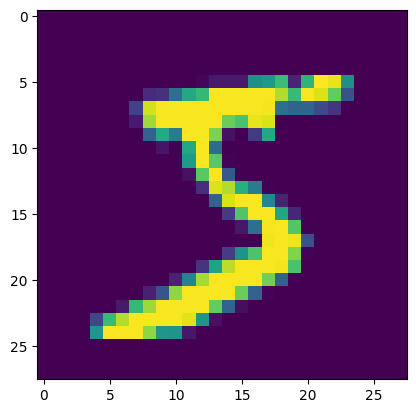

In [ ]:
# show the first input data object
plt.imshow(x_train[0])

In [ ]:
# check how many possible values are in the target variable
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# check what is the minimum and maximum value and data type of the features dataset
x_train.min(), x_train.max(), x_train.dtype

(0.0, 1.0, dtype('float64'))

In [ ]:
# scale the imput data so that it is min=0 and max=1 (min-max scaling) and that the values are floating point objects
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
# the shape should have not changed
x_train.shape

(60000, 28, 28)

In [ ]:
#the number of pixels in the data is
28*28

784

# Build the first Artificial Neural Network
solve the problem as a regression - see slides for the appropriate choices

- use dense layers
- choose the right number of neurons in output to solve a _regression_ problem
- choose the right activation function on the last layer for a _regression_ problem
- chose the right loss function for a _regression_ problem


In [ ]:
# architecture hyperparametrs
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer with 10 neurons
# add the output  layer with 1
# your code goes here
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1))
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,781 (397.58 KB)

 Trainable params: 101,781 (397.58 KB)

 Non-trainable params: 0 (0.00 B)

The model has 101,781 trainable parameters. It features a Flatten layer with 784 neurons for input processing, a Dense layer with 128 neurons, and a Dropout layer. It also includes a Dense layer with 10 neurons and ends with a single-neuron output layer.

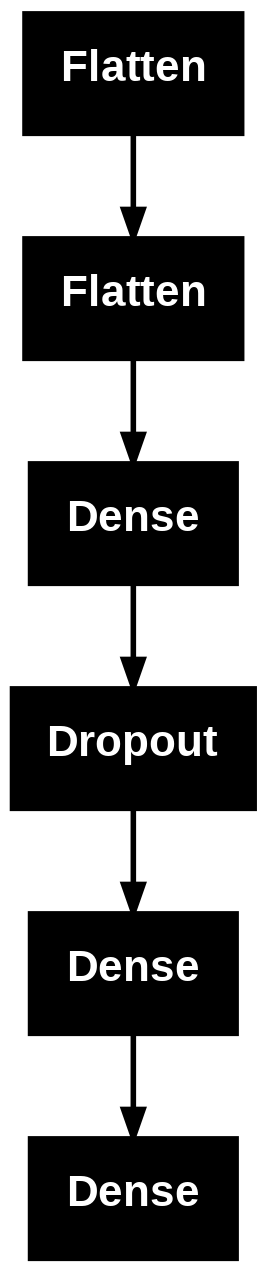

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
# training hyperparameter
# choose the MeanSquaredError and Adam as the optimizer

loss_fn = tf.keras.losses.MeanSquaredError()
optimizer = tf.keras.optimizers.Adam()

In [ ]:
#Preventing overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True )

In [ ]:
#train the model (did you make sure you are using GPUs??)
model.compile(optimizer = optimizer, loss = loss_fn,
              metrics=['accuracy'])
training_history = model.fit(x_train, y_train, epochs=500, callbacks=[early_stopping], validation_split=0.1)

Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1700 - loss: 1.3736 - val_accuracy: 0.1665 - val_loss: 1.1534
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1683 - loss: 1.3612 - val_accuracy: 0.1643 - val_loss: 1.1298
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1730 - loss: 1.3587 - val_accuracy: 0.1620 - val_loss: 1.1310
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1718 - loss: 1.3538 - val_accuracy: 0.1640 - val_loss: 1.1654
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1716 - loss: 1.3332 - val_accuracy: 0.1613 - val_loss: 1.1583
Epoch 6/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1717 - loss: 1.3614 - val_accuracy: 0.1697 - val_loss: 1.2145
Epoch 7/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1707 - loss: 1.3790 - val_accuracy: 0.1678 - val_loss: 1.1749


the training_history object contains the loss curves: training loss as `training_history.history["loss"]` and validation loss as `training_history.history["val_loss"]` (note the validation_split argument to model.fit set to 10%).

Show the training and validation losses and comment: is the model overfitting? at what epoch did it start to overfit?

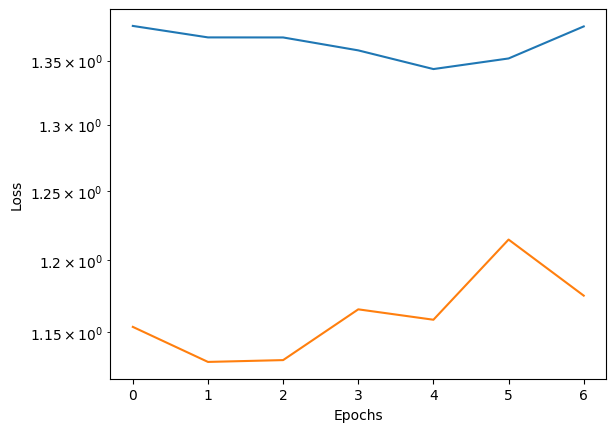

In [ ]:
plt.plot(training_history.history["loss"])
plt.plot(training_history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.yscale('log') #use log scale for the y axis

In [ ]:
# is this model overfitting? how woudl you find out? how would you fix it?

Yes, this model is overfitting because the training loss stays relatively low and stable, whereas the validation loss increases over time. We can identify it by an increasing validation loss and a large gap between training and validation accuracy. To fix this, we can use regularization techniques, dropout, early stopping (which has already been tried but resulted in this graph), data augmentation, simplify the model, and employ cross-validation

In [ ]:
#what is the accuracy of the model? use model.evaluat to assess it
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1591 - loss: 1.3575


[1.1869903802871704, 0.1664000004529953]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
Data point 1:
  Actual label: 7
  Predicted value: 6.678735733032227


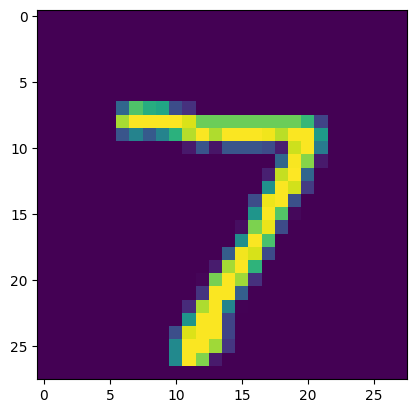

Data point 2:
  Actual label: 2
  Predicted value: 1.721630334854126


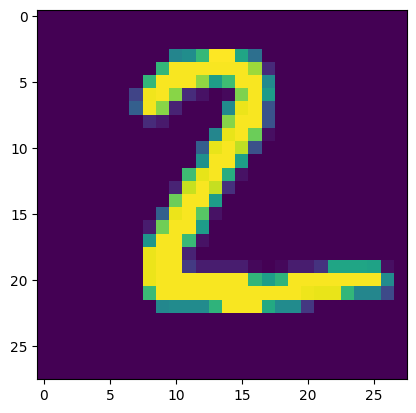

Data point 3:
  Actual label: 1
  Predicted value: 1.119908332824707


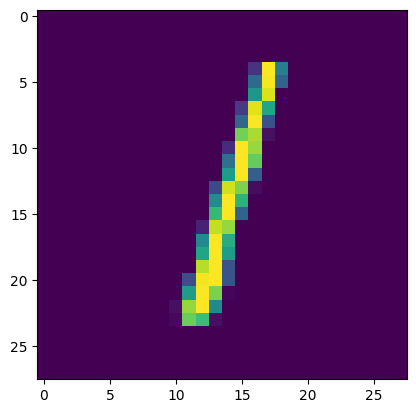

Data point 4:
  Actual label: 0
  Predicted value: 0.13440021872520447


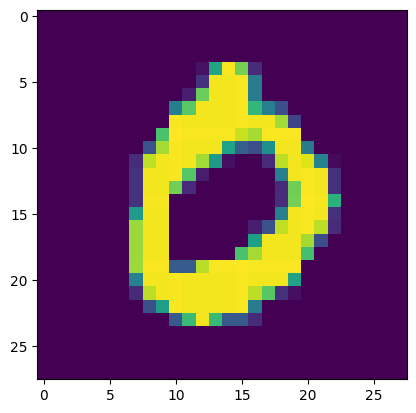

Data point 5:
  Actual label: 4
  Predicted value: 3.8535587787628174


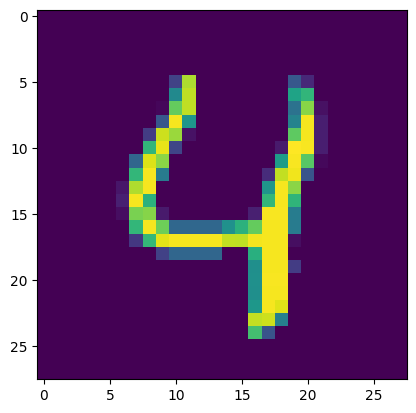

In [ ]:
# show the first 5 data points and corresponding predictions
predictions = model.predict(x_test[:5])

for i in range(5):
  print(f"Data point {i+1}:")
  print(f"  Actual label: {y_test[i]}")
  print(f"  Predicted value: {predictions[i][0]}")
  plt.imshow(x_test[i])
  plt.show()

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

# Build a ANN to solve the problem as a multiclass classification

see slides for the apprioriate choices
- use dense layers
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

In [ ]:
# modify the architecture hyperparametrs
# set the last layer to a 10 nerons dense layer and set the softmax as the activation function for the last layer
prob_model = tf.keras.models.Sequential()
# add 1 dense layer with 128 neurons and relu activation function
# add 1 dropout layers dropping 20% of the connections
# add 1 dense layer at the end, how many neurons?
prob_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
prob_model.add(tf.keras.layers.Dense(128, activation='relu'))
prob_model.add(tf.keras.layers.Dropout(0.2))
prob_model.add(tf.keras.layers.Dense(10, activation='softmax'))
prob_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

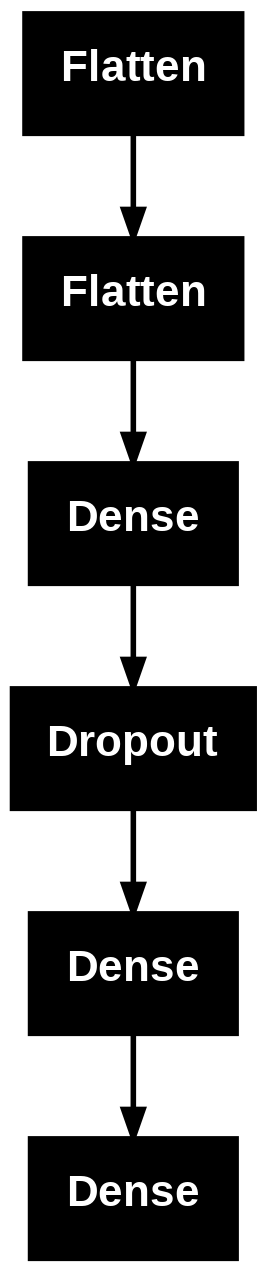

In [ ]:
tf.keras.utils.plot_model(model)

In [ ]:
#set the loss to be approprpate for the classification, the optimizer to Adam and compile and fit as before
# NOTE: you can either use the Sparse Categorical Loss and leave the labels as they are or use the Categorical Loss but modify the labels to be one-hot-encoded (see slides from class on trees!)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
# Assuming 'prob_model' is the intended model
prob_model.compile(optimizer = optimizer, loss = loss, metrics=['accuracy']) # Changed model3 to prob_model
CNN_training_history = prob_model.fit(x_train, y_train, epochs=500, callbacks=[early_stopping], validation_split=0.1) # Changed model3 to prob_model

Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.5204 - loss: 1.7695 - val_accuracy: 0.8633 - val_loss: 0.6346
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8251 - loss: 0.6503 - val_accuracy: 0.9050 - val_loss: 0.3971
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8643 - loss: 0.4797 - val_accuracy: 0.9167 - val_loss: 0.3219
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8802 - loss: 0.4183 - val_accuracy: 0.9218 - val_loss: 0.2869
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8930 - loss: 0.3693 - val_accuracy: 0.9270 - val_loss: 0.2643
Epoch 6/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9007 - loss: 0.3447 - val_accuracy: 0.9307 - val_loss: 0.2474
Epoch 7/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9050 - loss: 0.3314 - val_accuracy: 0.9348 - val_loss: 0.2363
Epoch 8/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9077 - loss: 0

In [ ]:
#what is the accuracy of the model? use model.evaluat to assess it
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1591 - loss: 1.3575


[1.1869903802871704, 0.1664000004529953]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
Data point 1:
  Actual label: 7
  Predicted label: 7


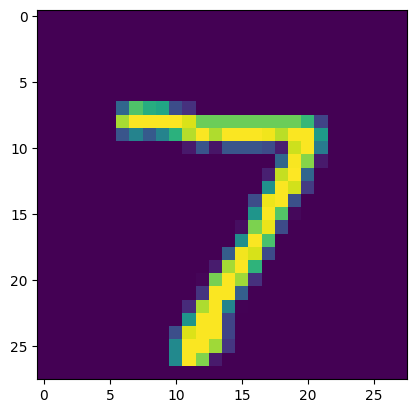

Data point 2:
  Actual label: 2
  Predicted label: 2


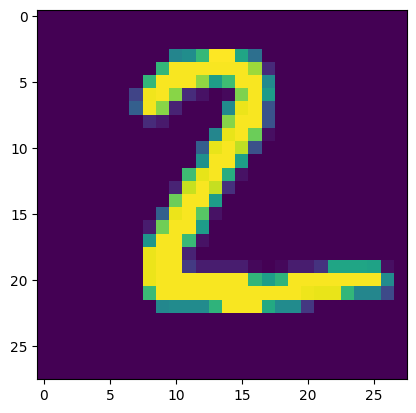

Data point 3:
  Actual label: 1
  Predicted label: 1


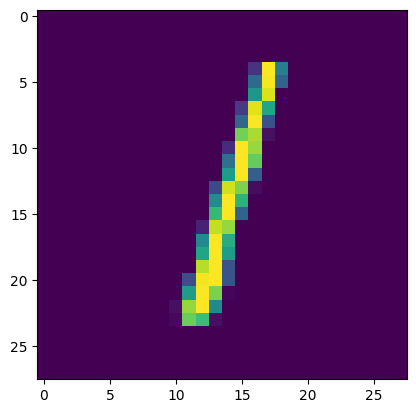

Data point 4:
  Actual label: 0
  Predicted label: 0


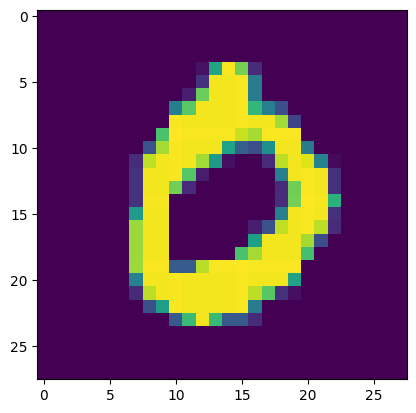

Data point 5:
  Actual label: 4
  Predicted label: 4


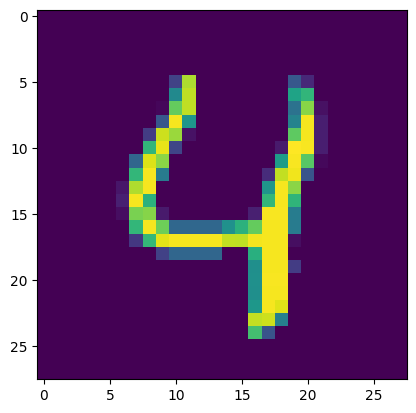

Data point 6:
  Actual label: 1
  Predicted label: 1


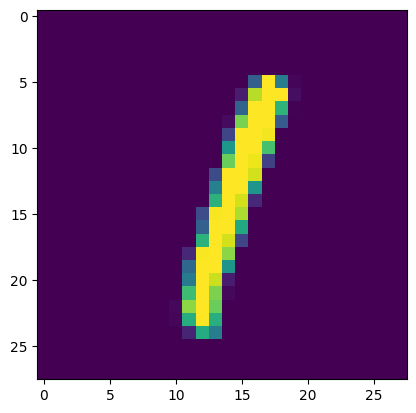

Data point 7:
  Actual label: 4
  Predicted label: 4


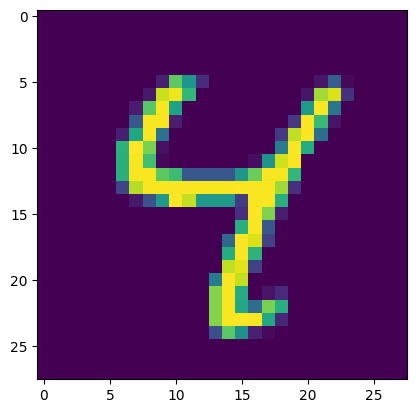

Data point 8:
  Actual label: 9
  Predicted label: 9


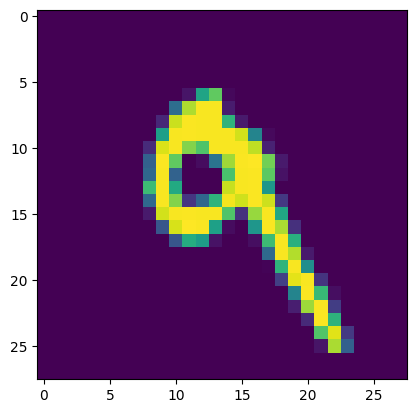

Data point 9:
  Actual label: 5
  Predicted label: 6


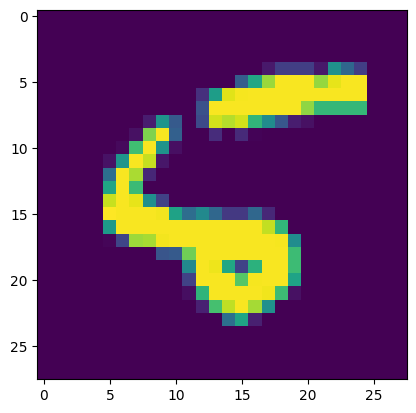

Data point 10:
  Actual label: 9
  Predicted label: 9


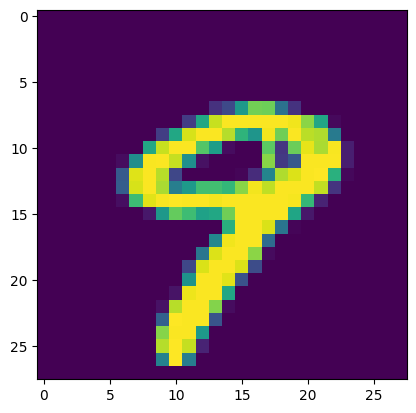

In [ ]:
# show the first 10 data points and corresponding predictions

result = prob_model.predict(x_test[:10])

for i in range(10):
    print(f"Data point {i+1}:")
    print(f"  Actual label: {y_test[i]}")
    print(f"  Predicted label: {np.argmax(result[i])}")
    plt.imshow(x_test[i])
    plt.show()

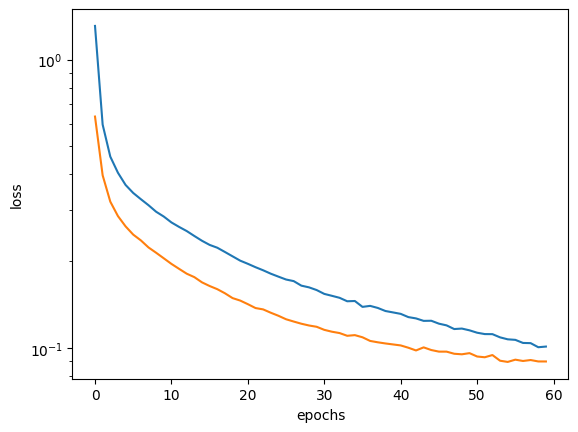

In [ ]:
#show the loss curves and comment
plt.plot(CNN_training_history.history["loss"])
plt.plot(CNN_training_history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale('log') #use log scale for the y axis


This model is neither overfitting nor underfitting. The training and validation loss suggests that the model is overfitting, as it performs well on the training data but does not generalize well to unseen data.

# Build a CNN (convolutional neural network) to solve the problem as a multiclass classification

- you do not need the Flatten() layer anymore, the input size is not 728 but (28,28)
- use Conv2D layers and MaxPool2D layers alternating them appropriately
- use relu activation functions for the convolutional layers
- add a dense layer at the end for the prediction
- choose the right number of neurons in output to solve a multiclass classification problem
- choose the right activation function on the last layer for a multiclass classification problem
- choose the right loss function for a multiclass classification problem

In [ ]:
model3 = tf.keras.models.Sequential()
# First layer
model3.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))

# Second layer
model3.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
# Fully connected dense layer

model3.add(tf.keras.layers.Dense(64, activation='relu'))
model3.add(tf.keras.layers.GlobalAveragePooling2D())

# Output layer with softmax activation
model3.add(tf.keras.layers.Dense(10, activation='softmax'))
model3.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5, 5, 64)            │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 64)                  │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,626 (92.29 KB)

 Trainable params: 23,626 (92.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#set the loss to be approprpate for the classification, the optimizer to Adam and compile and fit as before
# NOTE: you can either use the Sparse Categorical Loss and leave the labels as they are or use the Categorical Loss but modify the labels to be one-hot-encoded (see slides from class on trees!)
loss = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()
model3.compile(optimizer = optimizer, loss = loss, metrics=['accuracy'])
CNN_training_history = model3.fit(x_train, y_train, epochs=500, callbacks=[early_stopping], validation_split=0.1)

Epoch 1/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.1116 - loss: 2.3018 - val_accuracy: 0.1050 - val_loss: 2.3019
Epoch 2/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1131 - loss: 2.3012 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 3/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.1134 - loss: 2.3014 - val_accuracy: 0.1050 - val_loss: 2.3023
Epoch 4/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.1132 - loss: 2.3014 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 5/500
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.1149 - loss: 2.3012 - val_accuracy: 0.1050 - val_loss: 2.3023


In [ ]:
#what is the accuracy of the model? use model.evaluat to assess it
model3.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1160 - loss: 2.3007


[2.30100154876709, 0.11349999904632568]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Data point 1:
  Actual label: 7
  Predicted label: 7


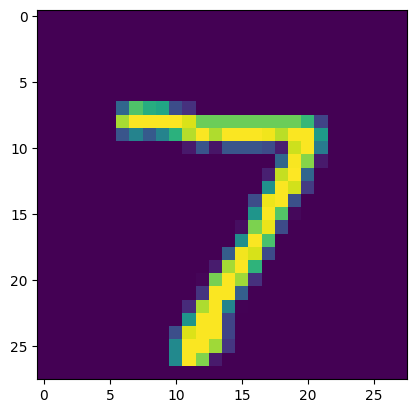

Data point 2:
  Actual label: 2
  Predicted label: 2


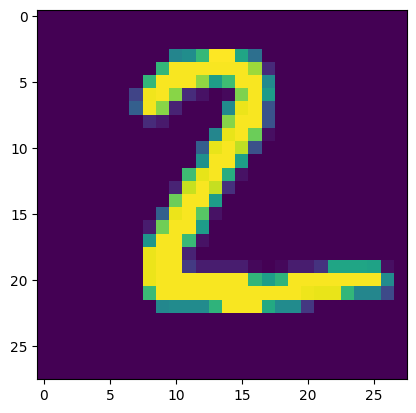

Data point 3:
  Actual label: 1
  Predicted label: 1


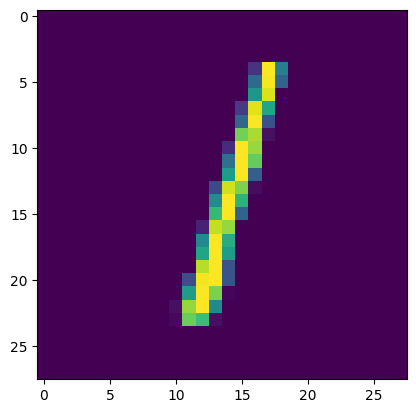

Data point 4:
  Actual label: 0
  Predicted label: 0


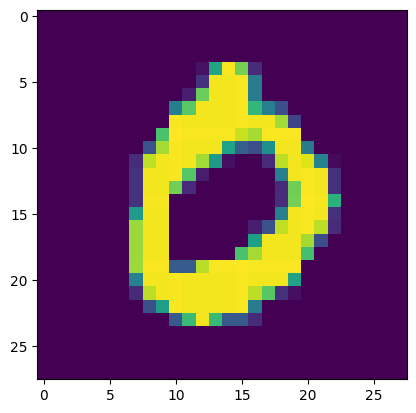

Data point 5:
  Actual label: 4
  Predicted label: 4


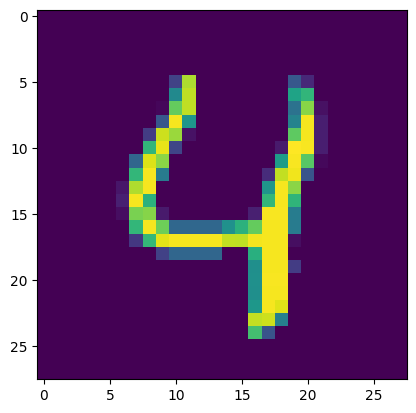

Data point 6:
  Actual label: 1
  Predicted label: 1


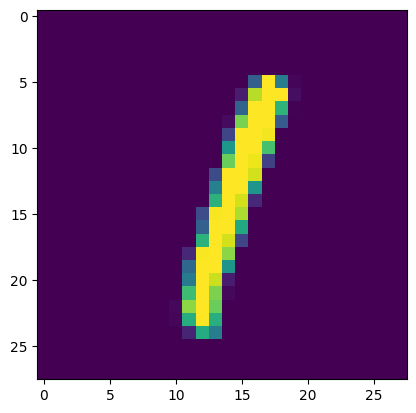

Data point 7:
  Actual label: 4
  Predicted label: 4


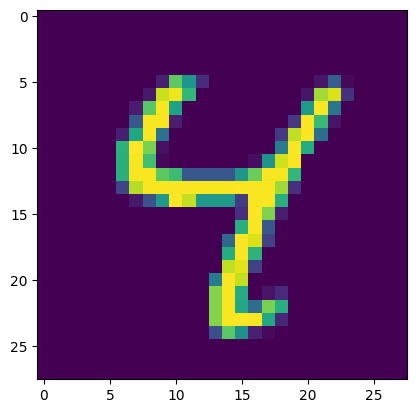

Data point 8:
  Actual label: 9
  Predicted label: 9


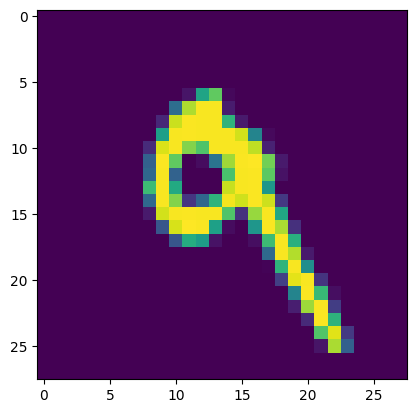

Data point 9:
  Actual label: 5
  Predicted label: 6


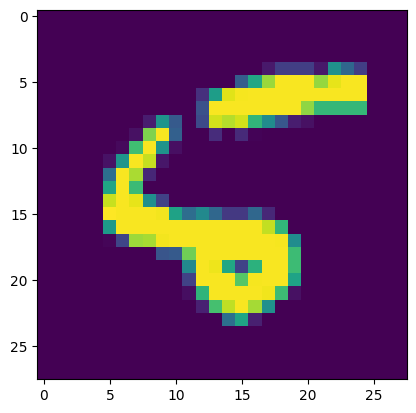

Data point 10:
  Actual label: 9
  Predicted label: 9


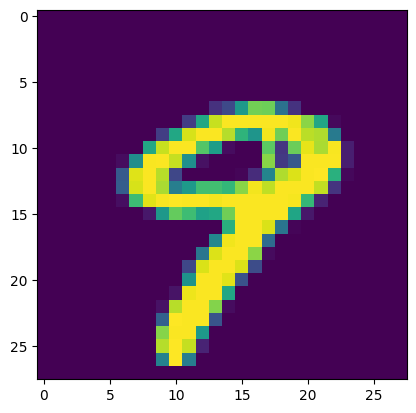

In [ ]:
# show the first 10 data points and corresponding predictions

result = prob_model.predict(x_test[:10])

for i in range(10):
    print(f"Data point {i+1}:")
    print(f"  Actual label: {y_test[i]}")
    print(f"  Predicted label: {np.argmax(result[i])}")
    plt.imshow(x_test[i])
    plt.show()

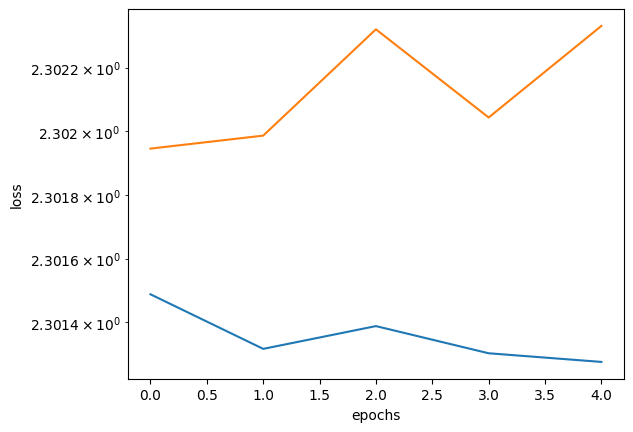

In [ ]:
#show the loss curves and comment
plt.plot(CNN_training_history.history["loss"])
plt.plot(CNN_training_history.history["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.yscale('log') #use log scale for the y axis
